In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [8]:
filename='selection_mc_0.h5'
with h5py.File(filename, "r") as f:
    print(list(f['chosen_indices'][:]))

[0, 1, 2, 3, 4, 5, 6, 7, 32, 33, 34, 35, 36, 37, 38, 39, 64, 65, 66, 67, 68, 69, 70, 71, 96, 97, 98, 99, 100, 101, 102, 103, 128, 129, 130, 131, 132, 133, 134, 135, 160, 161, 162, 163, 164, 165, 166, 167, 192, 193, 194, 195, 196, 197, 198, 199, 224, 225, 226, 227, 228, 229, 230, 231]


In [3]:
lin_size=32
Id=np.zeros((lin_size,lin_size))
Distance=np.zeros((lin_size*lin_size,lin_size*lin_size))
Id1=[[j for j in range(i*lin_size,i*lin_size+lin_size)] for i in range(lin_size)]
Id2=[[j for j in range(i*lin_size,i*lin_size+lin_size)] for i in range(lin_size)]
# for i in range()


Id1=np.array(Id1)
Id2=np.array(Id2)
print(Id.shape)
print(Distance.shape)

(32, 32)
(1024, 1024)


In [4]:
for i in range(lin_size):
    for j in range(lin_size):
        # Id1
        for k in range(lin_size):
            for l in range(lin_size):
                # Id2
                X_dis=abs(i-k)
                Y_dis=abs(l-j)
                # periodic boundary
                if(X_dis>=lin_size/2):
                    X_dis=lin_size-X_dis
                if(Y_dis>=lin_size/2):
                    Y_dis=lin_size-Y_dis
                Distance[i*lin_size+j,k*lin_size+l]=(X_dis**2+Y_dis**2)**0.5
print(Distance)



[[0.         1.         2.         ... 3.16227766 2.23606798 1.41421356]
 [1.         0.         1.         ... 4.12310563 3.16227766 2.23606798]
 [2.         1.         0.         ... 5.09901951 4.12310563 3.16227766]
 ...
 [3.16227766 4.12310563 5.09901951 ... 0.         1.         2.        ]
 [2.23606798 3.16227766 4.12310563 ... 1.         0.         1.        ]
 [1.41421356 2.23606798 3.16227766 ... 2.         1.         0.        ]]


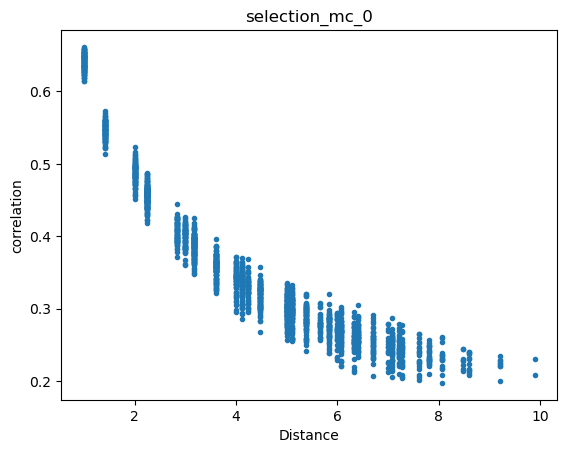

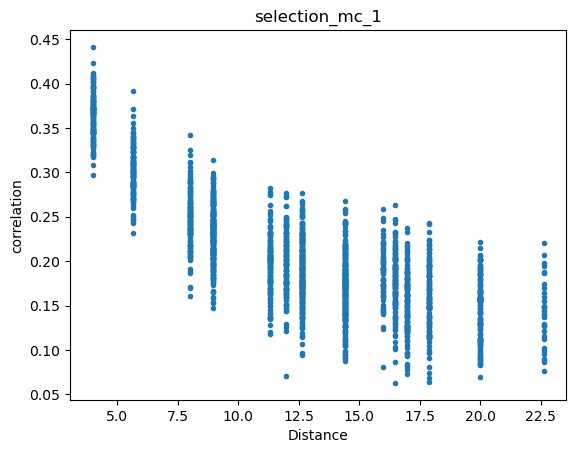

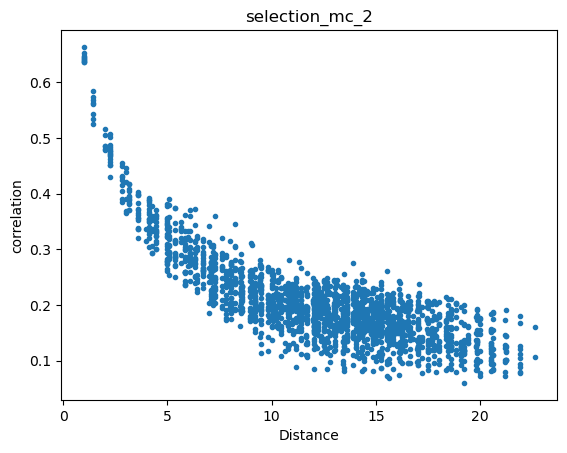

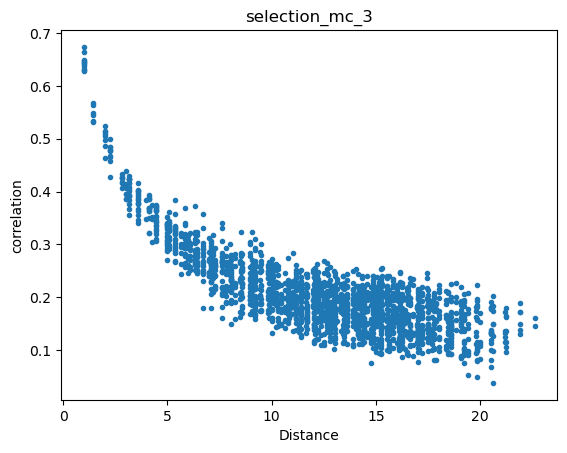

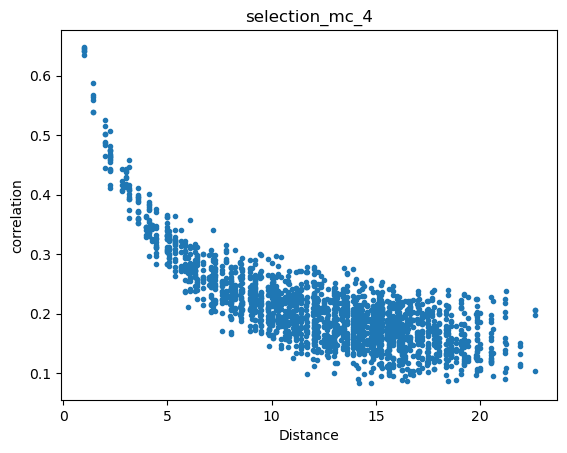

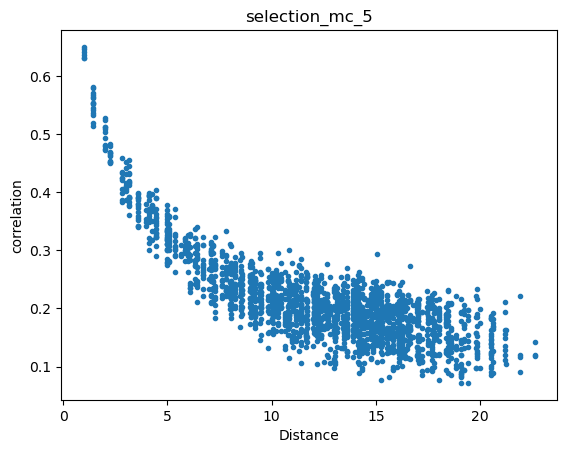

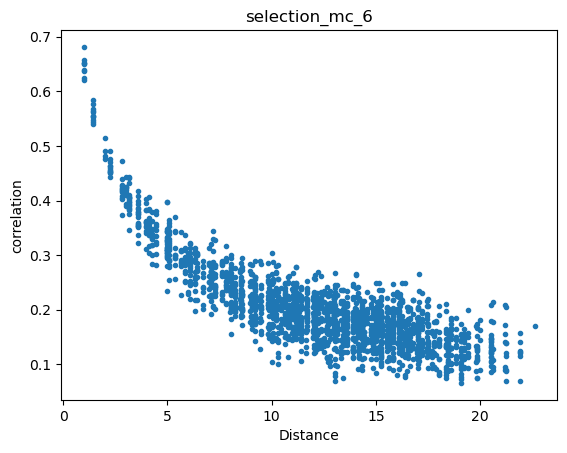

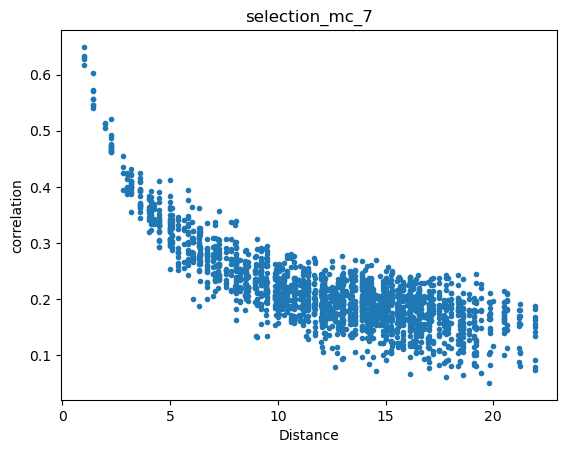

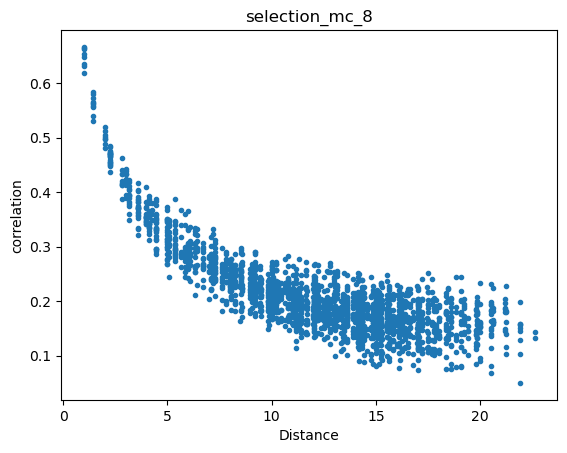

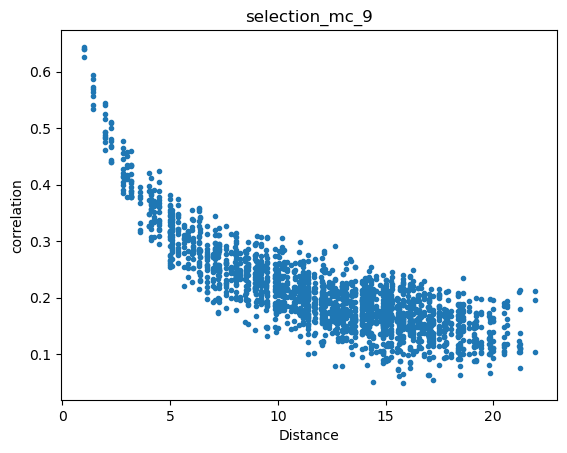

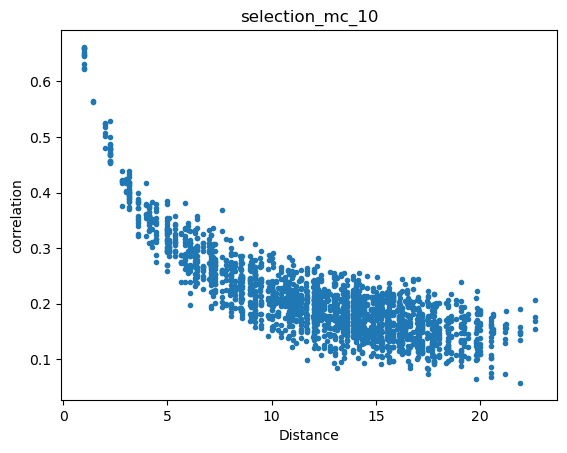

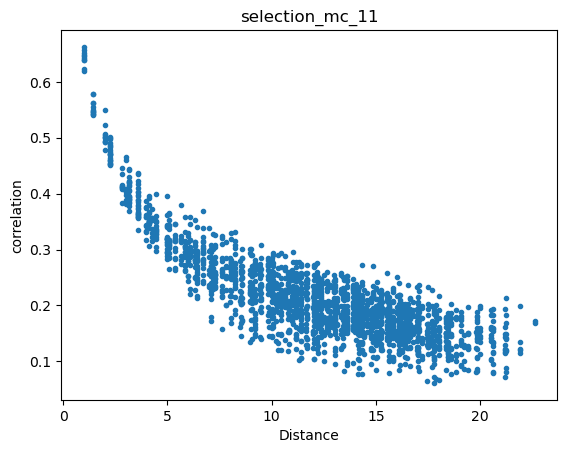

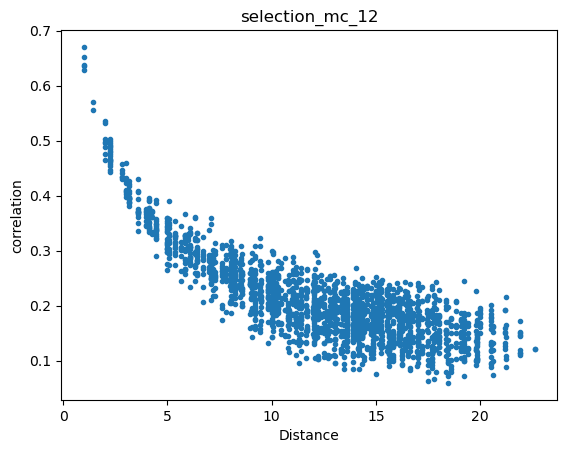

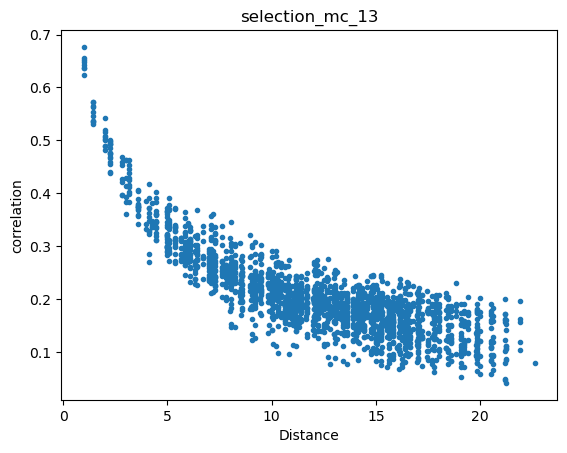

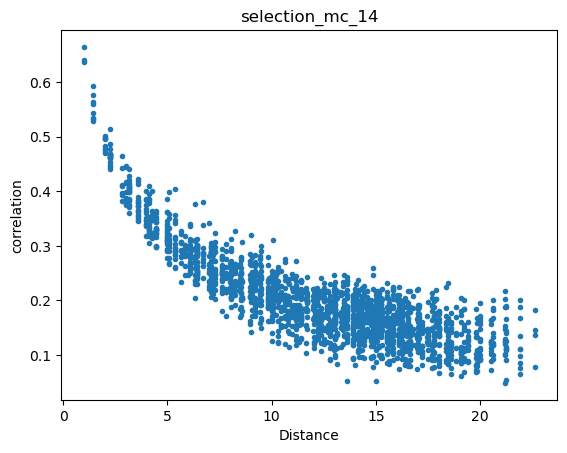

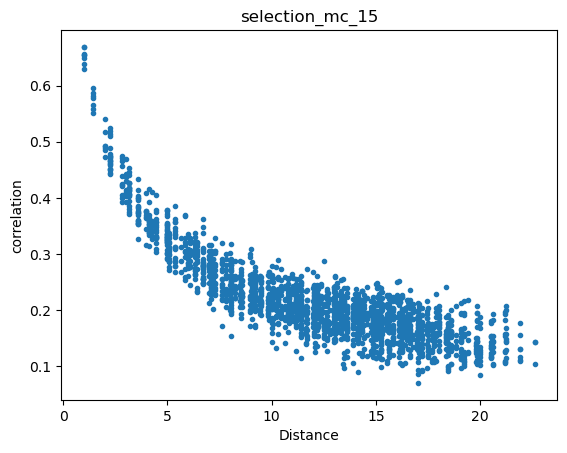

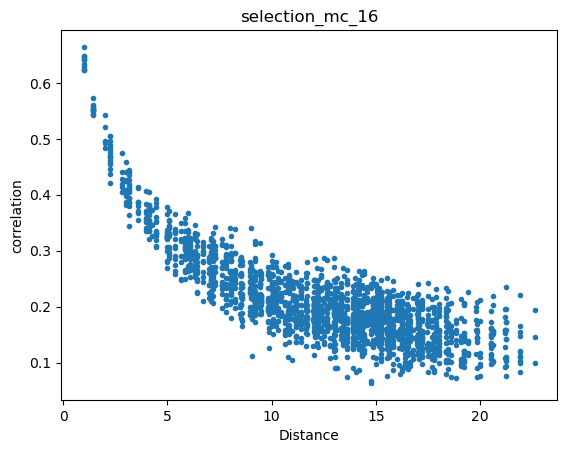

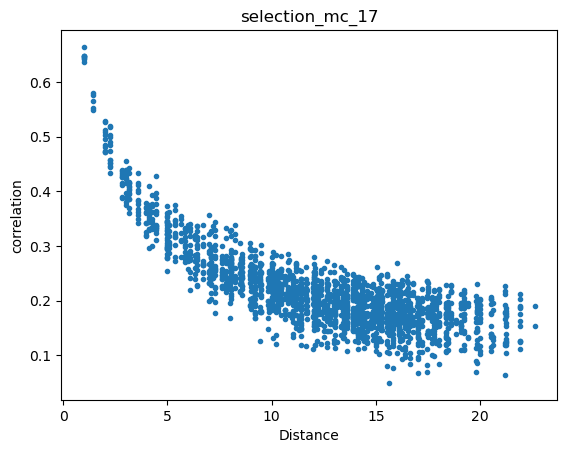

<Figure size 640x480 with 0 Axes>

In [25]:

for i in range(18):
    Dis_list=[]
    filename=f'selection_mc_{i}.h5'
    with h5py.File(filename, "r") as f:
        chosen_indices=list(f['chosen_indices'][:])
        Correlaiton_list=list(f['c'][:])
        for index1 in range(len(chosen_indices)):
            for index2 in range(index1):
                Dis_list.append(Distance[chosen_indices[index1],chosen_indices[index2]])

    plt.plot(Dis_list,Correlaiton_list,'.')
    plt.title(filename[:-3])
    plt.xlabel('Distance')
    plt.ylabel('correlation')
    plt.figure()
        
